In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 27.3 MB/s eta 0:00:00


In [ ]:
#from supervised.automl import AutoML
from sklearn.cluster import KMeans
import pandas as pd
import random
import os
#
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA, KernelPCA, SparsePCA, TruncatedSVD, FastICA
from sklearn.cluster import KMeans
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(69)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


### Data

In [ ]:
path = '/content/gdrive/MyDrive/air'
train = pd.read_csv(f'{path}/train_data.csv')
test = pd.read_csv(f'{path}/test_data.csv')
ans = f'{path}/answer_sample.csv'

train.head()


,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0


In [ ]:
test.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,2.51,53.28,0.7,32.54,2662.0,69.58,3.48,0
1,2.66,55.24,0.7,34.45,2819.0,71.32,3.57,0
2,1.72,42.74,0.7,22.23,1819.0,60.21,3.01,0
3,2.20,49.15,0.7,28.50,2332.0,65.91,3.30,0
4,2.06,47.28,0.7,26.67,2182.0,64.24,3.21,0


In [ ]:
train.describe()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
count,2463.000000,2463.000000,2.463000e+03,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000
mean,2.128843,49.001137,7.000000e-01,27.490715,2372.576939,65.766707,3.452972,2.957369
std,1.202328,8.725091,1.110448e-16,13.604597,687.870774,7.797152,1.576386,2.230113
min,0.330000,32.030000,7.000000e-01,5.340000,1201.000000,50.360000,1.970000,0.000000
25%,1.280000,41.600000,7.000000e-01,17.110000,1784.500000,59.150000,2.880000,1.000000
50%,1.960000,48.980000,7.000000e-01,25.850000,2358.000000,65.640000,3.260000,3.000000
75%,2.820000,56.355000,7.000000e-01,36.000000,2971.000000,72.275000,3.730000,5.000000
max,6.220000,64.960000,7.000000e-01,72.000000,3564.000000,80.520000,21.870000,7.000000


In [ ]:
test.describe()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
count,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000
mean,2.103129,49.042735,0.699840,27.417935,2373.820003,65.771623,3.345523,2.957369
std,1.163998,8.686208,0.005377,13.234089,687.737182,7.741473,0.644199,2.229811
min,0.340000,32.080000,0.490000,5.370000,1200.000000,50.420000,1.970000,0.000000
25%,1.280000,41.510000,0.700000,17.200000,1774.000000,59.110000,2.890000,1.000000
50%,1.940000,48.760000,0.700000,26.170000,2355.000000,65.520000,3.260000,3.000000
75%,2.770000,56.580000,0.700000,35.860000,2972.000000,72.440000,3.730000,5.000000
max,6.240000,65.540000,0.700000,74.000000,3564.000000,82.390000,6.260000,7.000000


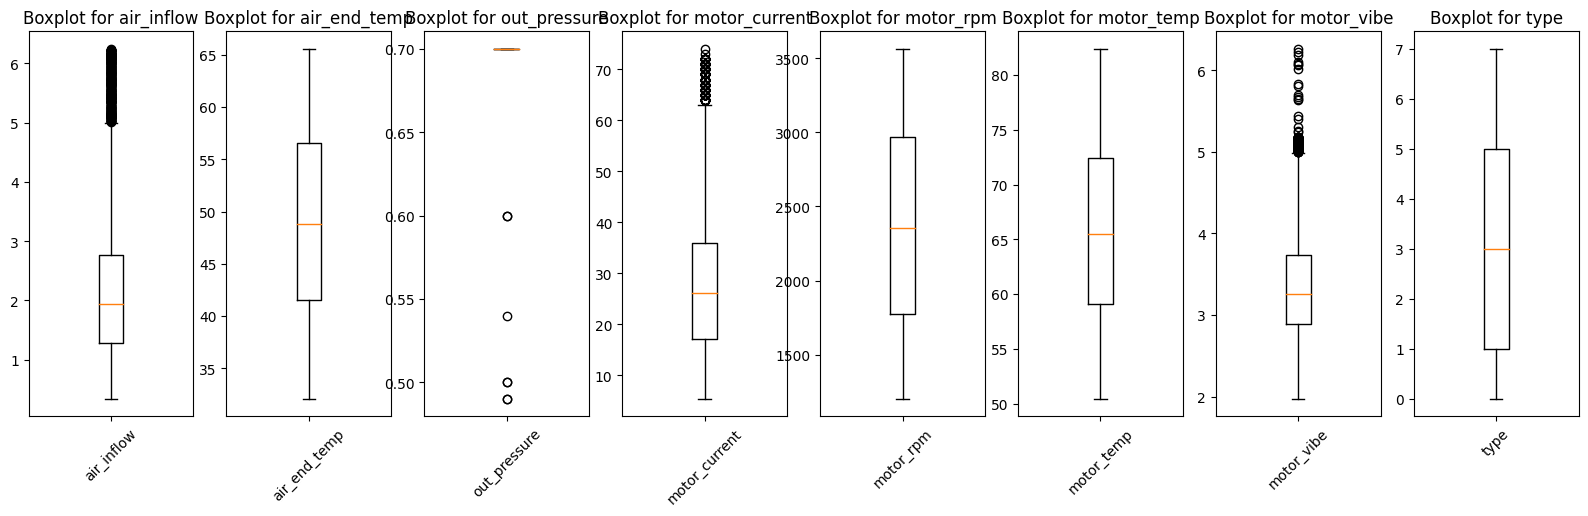

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 생성
#train_df = pd.read_csv('train.csv')

# Boxplot 그리기
fig, axs = plt.subplots(ncols=len(test.columns), figsize=(20, 5))

for i, column in enumerate(test.columns):
    axs[i].boxplot(test[column])
    axs[i].set_title(f'Boxplot for {column}')
    axs[i].set_xticklabels([column], rotation=45)

plt.show()

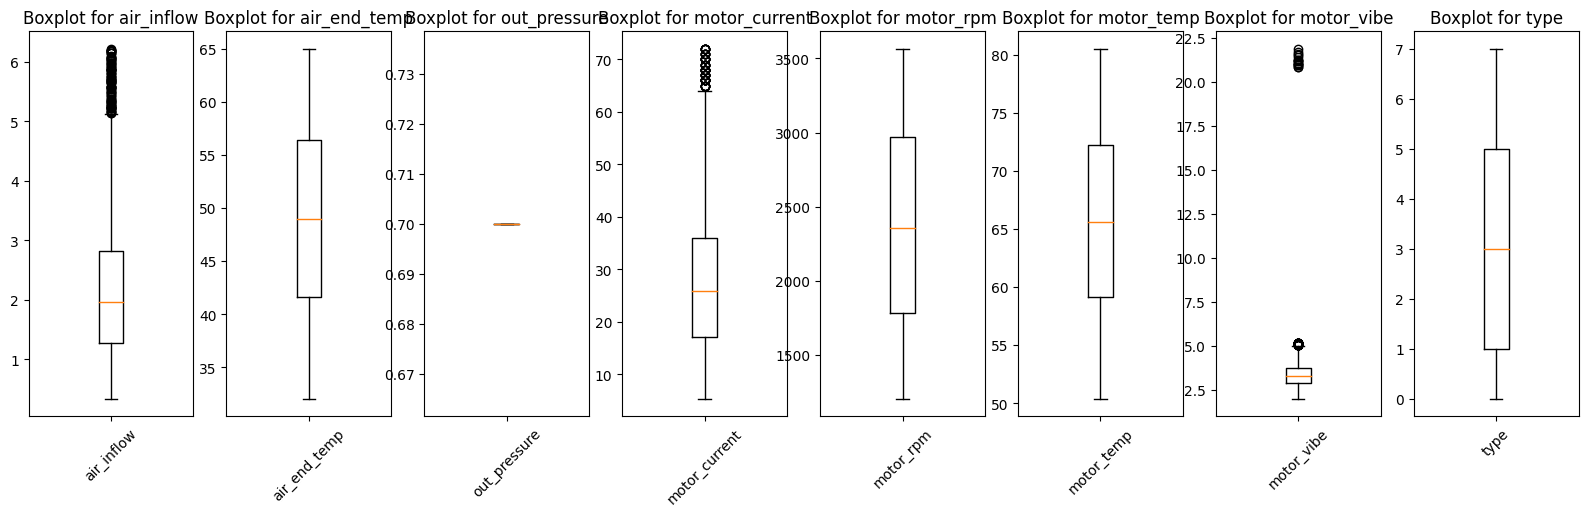

In [ ]:
fig, axs = plt.subplots(ncols=len(train.columns), figsize=(20, 5))

for i, column in enumerate(train.columns):
    axs[i].boxplot(train[column])
    axs[i].set_title(f'Boxplot for {column}')
    axs[i].set_xticklabels([column], rotation=45)

plt.show()
#air_inflow	air_end_temp	out_pressure	motor_current	motor_rpm	motor_temp	motor_vibe	type

In [ ]:
"""
train은 전부다 정상작동, test는 일부 고장이라고 가정할경우
고장에 영향을 주거나 받는 column은 out_pressure
"""

'\ntrain은 전부다 정상작동, test는 일부 고장이라고 가정할경우\n고장에 영향을 주거나 받는 column은 out_pressure\n'

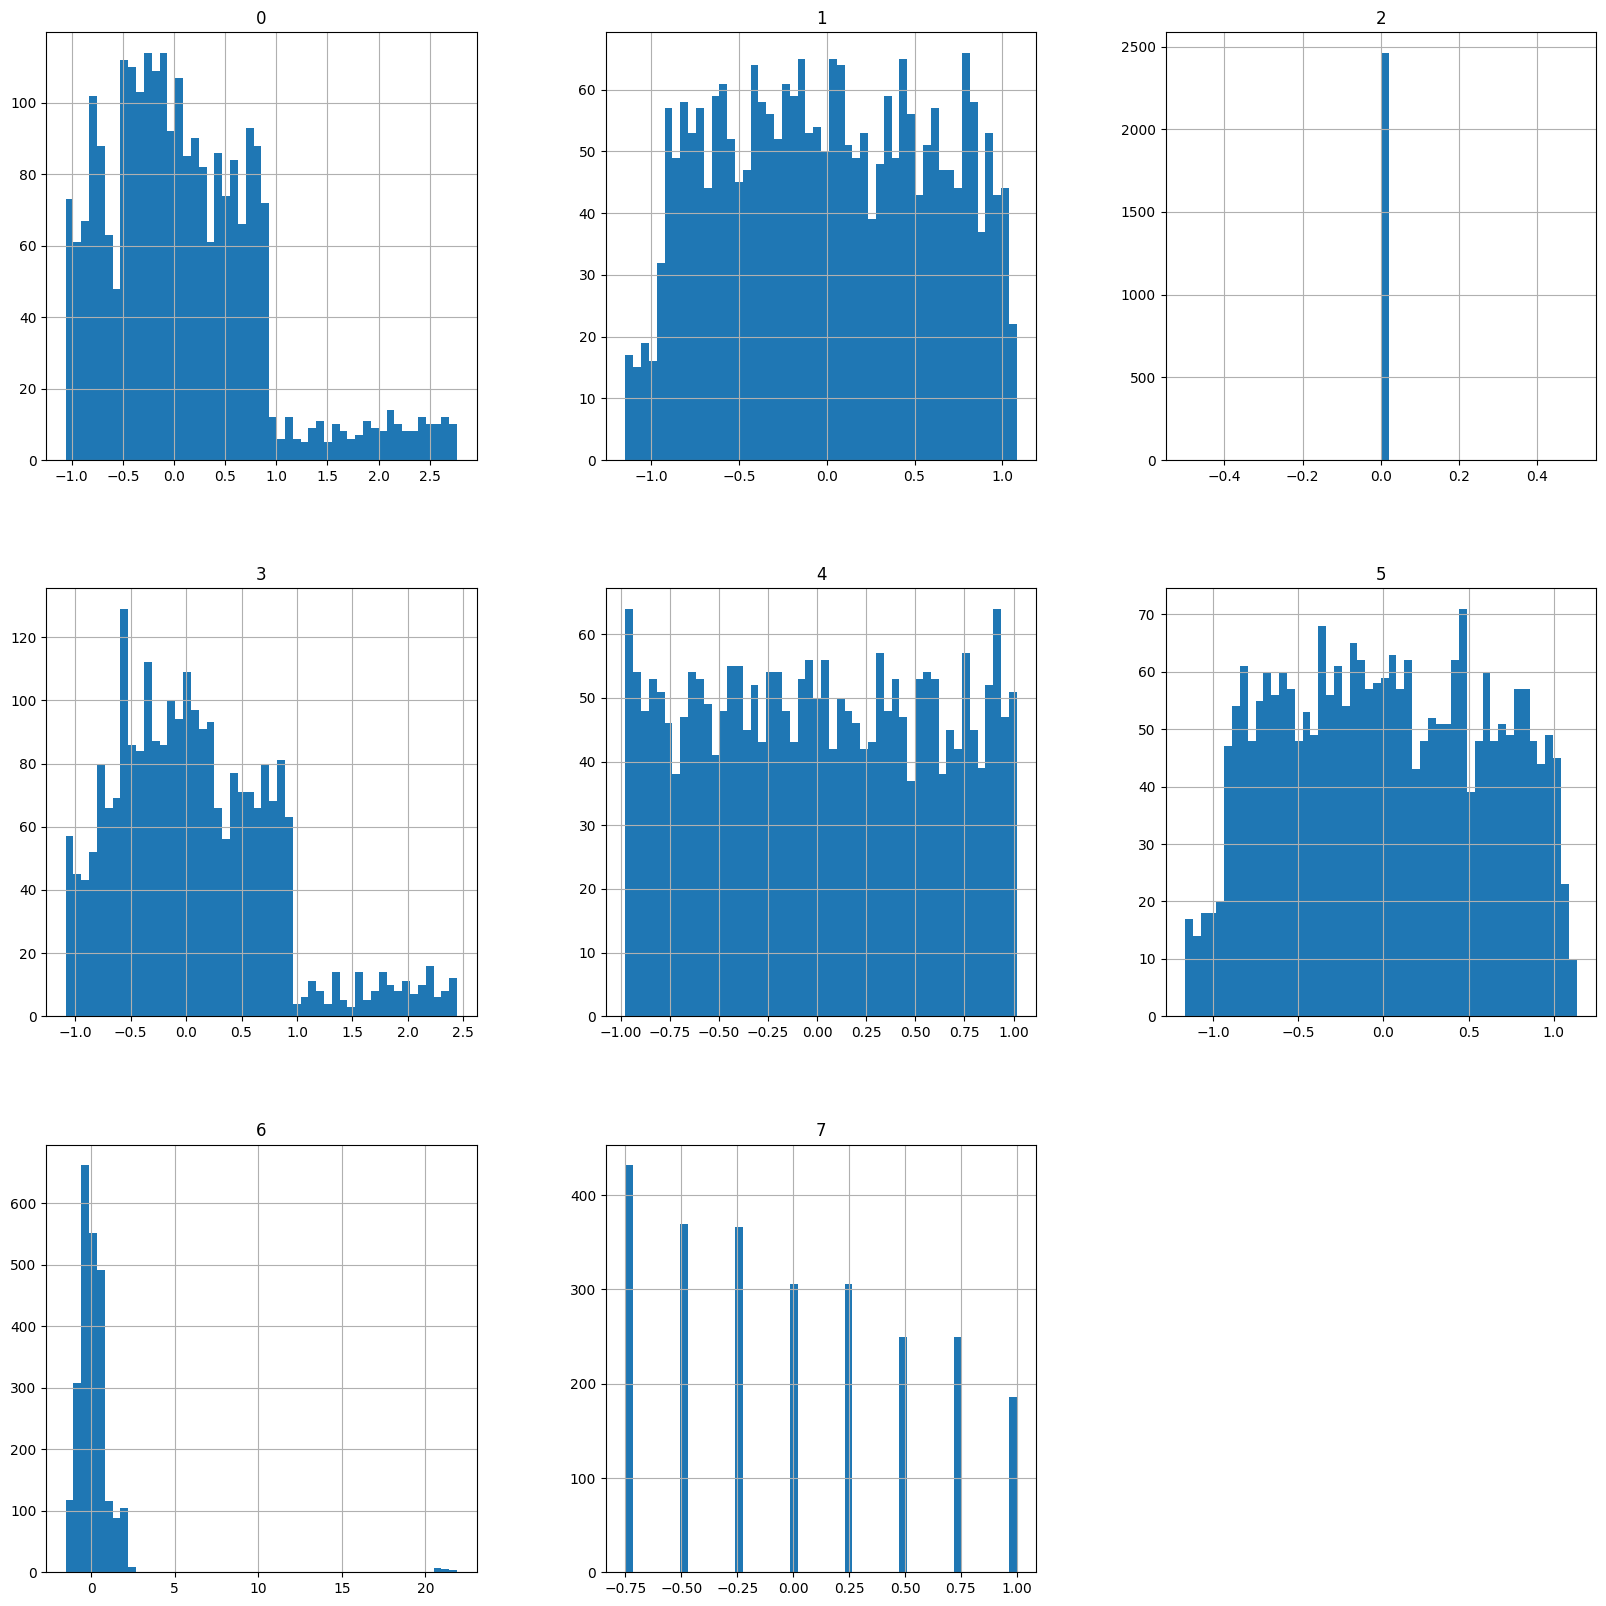

In [ ]:
scaled_train.hist(bins = 50, figsize = (20,20))
plt.show()

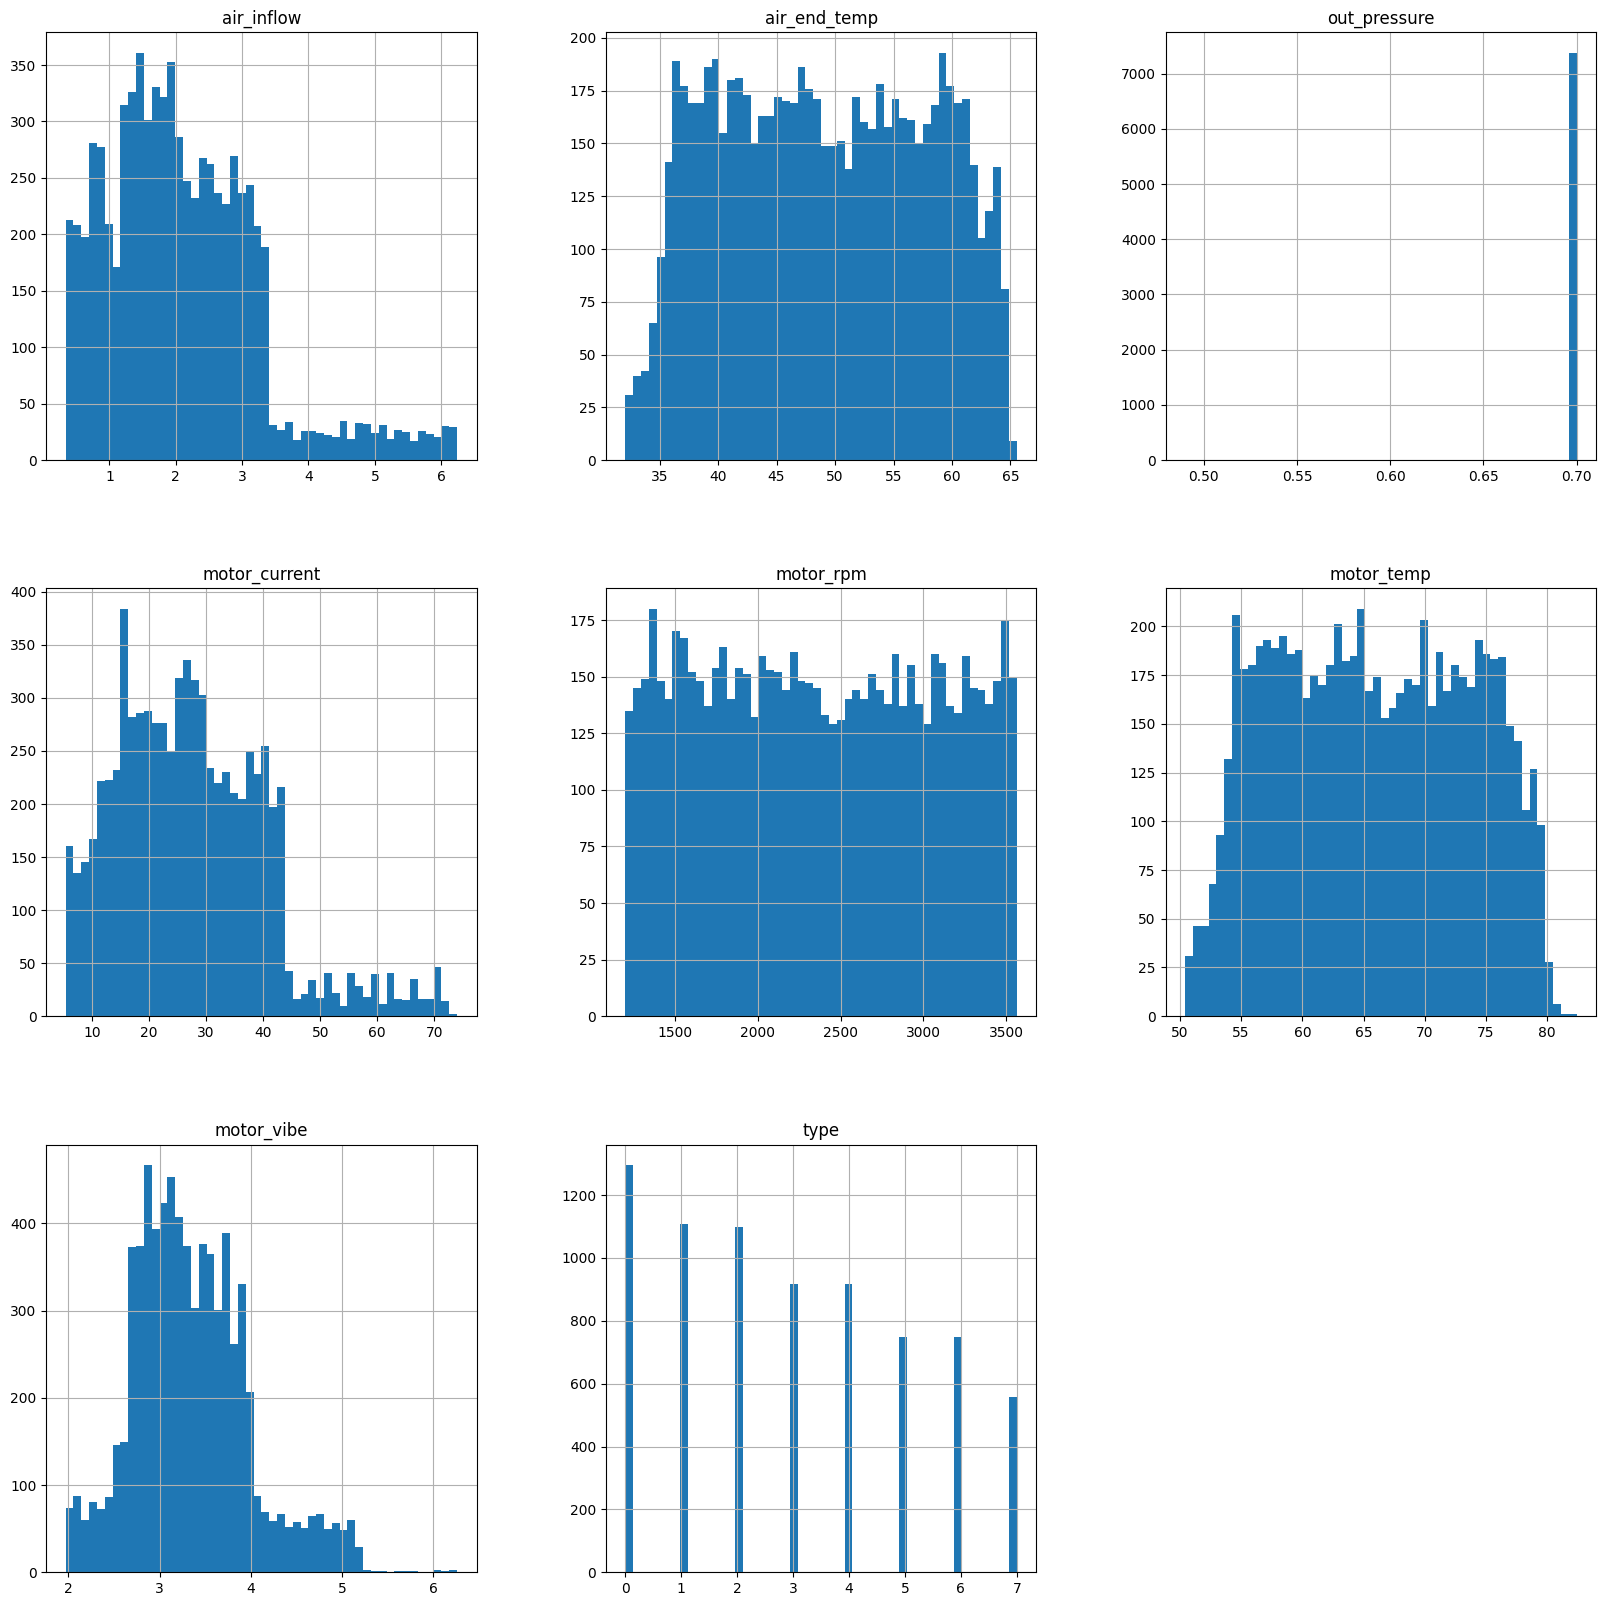

In [ ]:
test.hist(bins = 50, figsize = (20,20))
plt.show()

### KNN

In [ ]:
!pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.0.9-py3-none-any.whl size=184112 sha256=4ec7277a7d070e614b574394116e67277a83d71d0a7436afe8b668b7ec102389
  Stored in directory: /root/.cache/pip/wheels/1b/9c/b8/9759d7cc64a1e01bb9872ade80cb7db445ccf506e083325106
Successfully built pyod


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from pyod.models.knn import KNN
from pyod.utils.data import generate_data
from sklearn.preprocessing import MinMaxScaler

import numpy as np


In [ ]:
path = '/content/gdrive/MyDrive/air'
train = pd.read_csv(f'{path}/train_data.csv')
test = pd.read_csv(f'{path}/test_data.csv')
ans = f'{path}/answer_sample.csv'

In [ ]:
train.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0


In [ ]:
q3 = train.quantile(0.75)
q1 = train.quantile(0.25)
iqr = q3 - q1

In [ ]:
#air_inflow, motor_current,motor_vibe
def get_outlier(df=None, column=None, weight=1.5):

  # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
  
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
  
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

In [ ]:
outlier_idx = get_outlier(df=train, column='air_inflow', weight=1.5)
train.drop(outlier_idx, axis=0, inplace=True)
outlier_idx = get_outlier(df=train, column='motor_current', weight=1.5)
train.drop(outlier_idx, axis=0, inplace=True)
outlier_idx = get_outlier(df=train, column='motor_vibe', weight=1.5)
train.drop(outlier_idx, axis=0, inplace=True)

In [ ]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [ ]:
from sklearn.preprocessing import StandardScaler
standarded = StandardScaler()
train_standarded = standarded.fit_transform(train)
test_standarded = standarded.fit_transform(test)

train_ss = standarded.fit_transform(train_scaled)
test_ss = standarded.fit_transform(test_scaled)

In [ ]:
clf_name = 'KNN'
clf = KNN(n_neighbors=1, contamination=0.01, metric='euclidean')
clf.fit(train_scaled)

KNN(algorithm='auto', contamination=0.01, leaf_size=30, method='largest',
  metric='euclidean', metric_params=None, n_jobs=1, n_neighbors=1, p=2,
  radius=1.0)

In [ ]:
# k = 50
# acc = []
# for i in range(1,k+1):
#     clf_name = 'KNN'
#     clf = KNN(n_neighbors=i, contamination=0.01)
#     clf.fit(train_scaled)
#     preds = clf.predict(test_scaled)
#     y_train_scores = clf.decision_scores_
#     acc.append(np.max(y_train_scores))

In [ ]:
# plt.plot(acc)
# plt.title("Line Chart")

# plt.xlabel("Index")
# plt.ylabel("Value")

# plt.grid(True)

# plt.show()

In [ ]:
preds = clf.predict(test_scaled)

In [ ]:
cnt_0 = 0
cnt_1 = 0
for i in range(len(preds)):
    if preds[i] == 0:
       cnt_0 += 1 
    elif preds[i] == 1:
        cnt_1 += 1

In [ ]:
cnt_0, cnt_1

(7040, 349)

In [ ]:
y_train_scores = clf.decision_scores_  # train 데이터 점수
y_test_scores = clf.decision_function(test)  # test 데이터 점수

In [ ]:
y_train_scores

array([0.00147939, 0.00152598, 0.        , ..., 0.00206864, 0.00377335,
       0.00589248])

In [ ]:
y_test_scores.max()

3565.182943306588

In [ ]:
y_test_scores

array([2662.5893261 , 2819.60307964, 1819.57215927, ..., 1649.6019576 ,
       1679.59832554, 1801.58529262])

In [ ]:
np.max(y_train_scores)

0.2236892194736842

In [ ]:
#실제가 약 0.09정도 높았음

In [ ]:
ans = f'{path}/answer_sample.csv'
ans_df = pd.read_csv(ans)

In [ ]:
ans_df['label'] = preds

In [ ]:
ans_df['label'].value_counts()

0    7040
1     349
Name: label, dtype: int64

In [ ]:
ans_df.to_csv('answer.csv', index=False)